<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari and Jim Pitman</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

In [1]:
from prob140 import *
from datascience import *
import numpy as np
from scipy import special

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('fivethirtyeight')

# Homework 1 #

### Instructions

Your homeworks have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the homework are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

### How to Do Your Homework ###
The point of homework is for you to try your hand at using what you've learned in class. The steps to follow:

- Go to lecture and sections, and also go over the relevant text sections before starting on the homework. This will remind you what was covered in class, and the text will typically contain examples not covered in lecture. The weekly Preparation Guide will list what you should read.
- Work on some of the practice problems before starting on the homework.
- Attempt the homework problems by yourself with the text, section work, and practice materials all at hand. Sometimes the week's lab will help as well. The two steps above will help this step go faster and be more fruitful.
- At this point, seek help if you need it. Don't ask how to do the problem — ask how to get started, or for a nudge to get you past where you are stuck.
- For a good measure of your understanding, keep track of the fraction of the homework you can do by yourself or with minimal help. It's a better measure than your homework score, and only you can measure it.

### Rules for Homework ###
- Every answer should contain a calculation or reasoning. For example, a calculation such as $(1/3)(0.8) + (2/3)(0.7)$ or `sum([(1/3)*0.8, (2/3)*0.7])`is fine without further explanation or simplification. If we want you to simplify, we'll ask you to. But just ${5 \choose 2}$ by itself is not fine; write "we want any 2 out of the 5 frogs and they can appear in any order" or whatever reasoning you used. Reasoning can be brief and abbreviated, e.g. "product rule" or "not mutually excl."
- You may consult others (see "How to Do Your Homework" above) but you must write up your own answers using your own words, notation, and sequence of steps.
- We'll be using Gradescope. You must submit the homework according to the instructions in at the end of homework set.

### VIPs###
These are Very Important Problems, in the sense that they establish a general result or develop a technique that will be used repeatedly in the class. Don't seek help on these until you have made a very serious effort to solve them yourself. If you come up with the logic yourself, it will be easier for you to recognize when to apply it.

### 1. Getting Started ###
The data below are adapted from reports by Berkeley's Office of Planning and Analysis. The entries in the cells of the table are the counts of Berkeley degree recipients in 2017-2018.

|Degree           |Female|  Male |
|----------:|:----:|:-----:|
|**Undergraduate**|4276 |3680 |
|**Graduate**|1948 | 2291|

Suppose you pick one of these 12195 degree recipients at random. Complete the code cells with numerical expressions corresponding to the chances below.

**a)** P(female) $~~~~~~$ **b)** P(graduate | female) $~~~~~~$ **c)** P(female | graduate)

In [2]:

# Answer to Part a
a = (4276 + 1948) / 12195

# Answer to Part b
b = 1948 / (4276 + 1948)

# Answer to Part c
c = 1948 / (1948 + 2291)


a, b, c

(0.5103731037310373, 0.3129820051413882, 0.4595423448926634)

**d)** Suppose you draw five of the 12195 degree recipients at random without replacement. Explain why the draws are almost independent of each other. Enter your answer in the cell below. It doesn't require a calculation.

Because 5 is such a small number compared to 12195, even if the draw is without replacement, it doens not strongly affect the overal probability of the next draw. Hence, the previous draw doesn't strongly influence the next draw, and we can say the draws are almost independent. 

Now use **d** to find the following probabilities concerning the five people selected. You can use as many lines of code as you want, and you can use the quantities defined in the previous parts. The last line of the cell should evaluate to the probability.

**e)** P(all five are of the same gender)

In [3]:

# Answer to Part e

#partition into all male and all female
#all five are male
male = ((3680 + 2291) / 12195)**5

#all five are female
female = ((4276 + 1948) / 12195)**5

#add together
male + female

0.06276906109271552

**f)** P(at least one of the five got an undergraduate degree | all five are of the same gender)

In [5]:

# Answer to Part f

# P(all graduate degree | all same gender)
# all female
f = (1948 / (1948 + 4276))**5

# all male
m = (2291 / (2291 + 3680))**5

# P(all five same gender) - P(all graduate degree | all same gender)
((male + female) - (m + f))


0.05145024107290824

### 2. Heads in Coin Tossing [VIP] ###
This is one of the fundamental models of probability theory. Note that unless otherwise specified, coins in this course are assumed to be fair and tosses are assumed to be independent of each other.

This exercise is a series of quick observations. Before you start, look over some of the Combinatorics exercises in the [Math Prerequisites](http://prob140.org/assets/prereq_math_sp19.pdf) set.

Suppose you toss a coin $n$ times and note down the sequence of heads (H) and tails (T). 

Fix an integer $k$ such that $0 \le k \le n$.

**a)** In total, how many possible sequences are there? How many sequences have $k$ heads? 

[That means exactly $k$ heads, now and throughout the course. To answer the second question, it might help to imagine that there are $n$ empty spaces and you have to write the letter H in $k$ of them.]

**b)** What is the chance that you get $k$ heads in your $n$ tosses? Why?

**c)** Does your answer in **b** make sense in the cases $k=0$ and $k=n$? Explain.

**d)** `SciPy` is a Python library for scientific computing. You will be using it a lot in this course. In particular, the `special` module of `SciPy` computes combinatorial terms and has been imported in this notebook. 

To calculate $\binom{n}{k}$, use `special.comb(n, k)`.

In [3]:
special.comb(4, 3) * special.comb(48, 36) / special.comb(52, 39) 

0.43884753901560625

In [4]:
special.comb(39, 3) * (4 * 3 * 2 / (52 * 51 * 50))

1.6541176470588235

In [6]:
# 10 choose 2
special.comb(100, 50)

1.0089134454556415e+29

Define a function `chance_of_heads` that takes `n` and `k` as its arguments and returns the chance of `k` heads in `n` tosses of a fair coin. Do not use any built-in `SciPy` probability functions; just use your answer to **b**.

We have started the code for you. Try to ignore the fact that we have converted the integer `n` to a `float`. It won't affect `special.comb` and it will help ensure that the calculation is accurate when `n` and `k` are large.

In [7]:

def chance_of_heads(n, k):
    """Returns the chance of k heads in n tosses of a fair coin"""
    n = float(n)
    return special.comb(n, k) / (2**n)

To check whether your function is working correctly, list all possible outcomes of two tosses of a coin and hence calculate P(0 heads), P(1 head), and P(2 heads). You don't have to turn this in, but make sure it agrees with the output of the cell below.

In [8]:
chance_of_heads(2, 0), chance_of_heads(2, 1), chance_of_heads(2, 2)

(0.25, 0.5, 0.25)

**e)** A class has 8 GSIs. Each GSI tosses a coin 20 times and notes the number of heads. Write an expression that evaluates to the chance that none of the GSIs gets exactly 10 heads. Your expression should use your function `chance_of_heads`.

In [9]:
(1 - (chance_of_heads(20, 10)))**8

0.21212249859944513

### 3. Approximation ###
While it is great to have exact formulas for probabilities, if the formulas are complicated then it can be hard to tell how big the probabilities are. So it is useful to have good approximations that have simpler forms and can quickly give us a sense of the magnitude.

You have seen one such approximation already in the birthday problem. Here are two more.

**a)** There is a bet for which your chance of winning is $1/M$. The chance is small because $M$ is very large, but you are stubborn and decide to bet anyway. In fact you bet over and over again, hoping for a win. Assume that the bets are independent of each other. What is the smallest number of times you have to bet so that your chance of winning at least once is at least 1/2? Explain why the answer is roughly a linear function of $M$ (when $M$ is large).

**b)** In the previous exercise you found the chance of getting $m$ heads in $2m$ tosses of a coin. The chance involves some factorials, and factorials get large very quickly. *Stirling's approximation* says that for large $n$

$$
n! ~ \sim ~ \sqrt{2 \pi n} \cdot (n/e)^n
$$

where the symbol $\sim$ is read as "is asymptotically equivalent to" and means that the ratio of the two sides goes to 1 as $n$ tends to $\infty$.

Let $m$ be a positive integer. Use Stirling's formula to approximate the chance of getting exactly $m$ heads in $2m$ tosses of a fair coin, and say what the limit is as $m \to \infty$. Later in the course we will see why this doesn't contradict the law of averages.

**c)** For the number of tosses $2m = 50, 100, 150, \ldots, 400$, compare the approximation in **b** to the exact value, as follows. The table `chance_and_approx` starts off with just two columns:

In [10]:
tosses = np.arange(50, 401, 50)
heads = np.arange(25, 201, 25)
chance_and_approx = Table().with_column('Tosses', tosses,
                                       'Heads', heads)
chance_and_approx

Tosses,Heads
50,25
100,50
150,75
200,100
250,125
300,150
350,175
400,200


Augment the table with a column labeled `Exact Chance` that contains the chance of $m$ heads in $2m$ tosses, and a column labeled `Approximation` that contains the approximation you found in **b**.

Code tips:

- Use `np.pi` for $\pi$
- Use `apply` to get an array of exact chances. See for example the construction of the array `different` in [Section 1.4](http://prob140.org/textbook/chapters/Chapter_01/04_Birthday_Problem) of the textbook.

In [11]:

def exact_chance(m):
    """Returns P(m heads in 2m tosses)"""
    return chance_of_heads(2*m, m)

exact = chance_and_approx.apply(exact_chance, 'Heads' )         # array of exact chances
approx = 1 / ((np.pi * chance_and_approx[1])**(1/2))         # array of approximations

chance_and_approx = chance_and_approx.with_column('Exact Chance', exact,
                                                 'Approximation', approx)
chance_and_approx

Tosses,Heads,Exact Chance,Approximation
50,25,0.112275,0.112838
100,50,0.0795892,0.0797885
150,75,0.0650385,0.065147
200,100,0.0563485,0.056419
250,125,0.0504122,0.0504627
300,150,0.0460275,0.0460659
350,175,0.0426183,0.0426487
400,200,0.0398693,0.0398942


That's a great approximation! Run the cell below for a visual comparison.

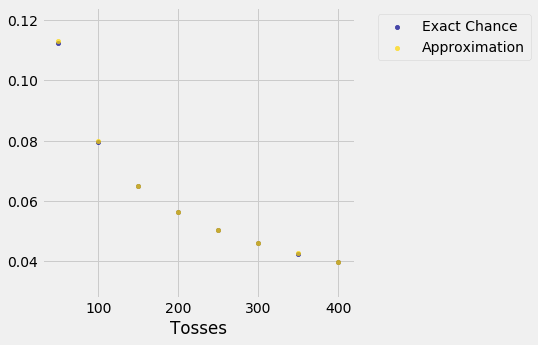

In [12]:
chance_and_approx.drop('Heads').scatter('Tosses')

### 4. Extrema and Tails [VIP]###

The maximum and minimum of a random sample of numbers are called the "extrema" of the sample. Distributions of extrema are best described using the left or right hand tail probabilities. In this exercise you will see how.

Fix positive integers $n$ and $N$. Suppose $n$ draws are made at random with replacement from the numbers $\{1, 2, 3, \ldots, N\}$. Let $X_i$ be the number that appears on the $i$th draw.

Let $V_n = \min\{X_1, X_2, \ldots, X_n\}$ be the sample minimum and let $W_n = \max\{X_1, X_2, \ldots, X_n\}$ be the sample maximum.

**a)** The event that a sample maximum is "small" is straightforward to describe in terms of the individual elements of the sample. To see this, fill in the blank with an appropriate mathematical symbol or English phrase. Justify your answer.

Fix an integer $k$ such that $1 \le k \le N$. The event "$W_n \le k$" is the same as the event "each of $X_1, X_2, \ldots, X_n$ is $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~} k$".

It might help to draw the number line, mark the integers 1 through $N$, and put a special mark on $k$. For the maximum to be at or to the left of $k$, where do all the $X$'s have to be?

**b)** For $1 \le k \le N$, use Part **a** to find $P(W_n \le k)$. 

**c)** Use Part **b** to find $P(W_n = k)$ for $1 \le k \le N$ and to show algebraically that $\sum_{k=1}^N P(W_n = k) = 1$.

**d)** Modify Part **a** for the event that the sample minimum is "large", by filling in the blank with an appropriate mathematical symbol or English phrase. Justify your answer.

The event "$V_n \ge k$" is the same as the event "each of $X_1, X_2, \ldots, X_n$ is $\underline{~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~} k$".

**e)** Use Part **d** to find $P(V_n = k)$ for $1 \le k \le N$.

**f)** Let $j$ and $k$ be integers such that $0 \le j \le k \le N$. Modify Parts **a** and **d** to find $P(V_n \ge j, W_n \le k)$.

### 5. Mirror Images ###
Let $D_1, D_2, D_3, D_4$ represent the numbers on four rolls of a die. Let $V = \min\{D_1, D_2, D_3, D_4\}$, $W = \max\{D_1, D_2, D_3, D_4\}$, $S = \sum_{i=1}^4 D_i$.

**a)** If possible, use one of the symbols $\stackrel{d}{=}$ or $=$ to fill in the blank in $D_1 \underline{~~~~~~~~~~~~~} D_2$. Explain; and if both can be used, say why.

**b)** If possible, use one of the symbols $\stackrel{d}{=}$ or $=$ to fill in the blank in $S \underline{~~~~~~~~~~~~~} 4D_1$. Explain; and if both can be used, say why.

**c)** Use the previous exercise and the code cell below to draw the probability histogram of $W$. You will need some `prob140` methods which are used in [Section 3.2](http://prob140.org/textbook/chapters/Chapter_03/02_Distributions) of the textbook.

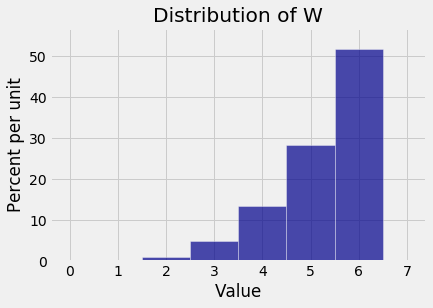

In [13]:

n = 4
N = 6
k = np.arange(1, N+1)

# array consisting of P(W=k)
probs_W = (k/N)**n - ((k-1) / N)**n

dist_W = Table().values(k).probabilities(probs_W)
Plot(dist_W)
plt.title('Distribution of W');

**d)** Use the code cell below to draw the probability histogram of $V$.

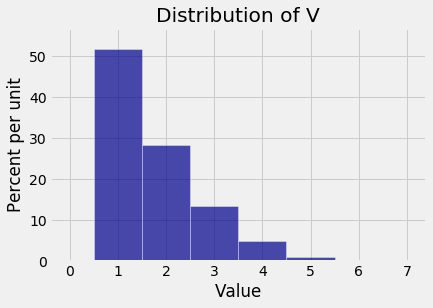

In [14]:
probs_V = ((N - k + 1) / N)**n - ((N - k) / N)**n

dist_V = Table().values(k).probabilities(probs_V)
Plot(dist_V)
plt.title('Distribution of V');

**e)** Look at the two probability histograms above, and fill in the blanks with numbers. No explanation needed.

$P(V = 2) = P(W = \underline{~~~~~~~~~}~)$ and $V \stackrel{d}{=} \underline{~~~~~~~~~} - W$.

### 6. Two IID Random Variables [VIP] ###

Let $R$ and $S$ be independent and identically distributed (i.i.d.) integer-valued random variables, with distribution given by

$$
P(R = k) ~ = ~ 
\begin{cases} 
c \cdot \frac{1}{k}, ~~ 1 \le k \le 10 \\
0 ~~~~~ \text{otherwise}
\end{cases}
$$

where $c$ is a constant. 

**a)** Find a formula for $c$. You might want to write out all 10 probabilities in terms of $c$ first, but this isn't required.

**b)** Complete the cell below to plot the probability histogram of $R$.

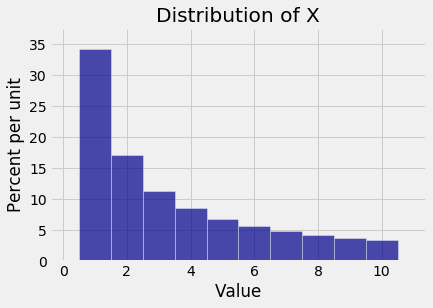

In [15]:

k = np.arange(1, 11)   # array of possible values of R
p = 1/(np.sum(1 / k)) * 1 / k                # array of probabilities of those values
dist_R = Table().values(k).probabilities(p)
Plot(dist_R)
plt.title('Distribution of X');

Before you do the remaining parts it is highly recommended that you read the examples in Section 4.2 of the [textbook](http://prob140.org/textbook/chapters/README).

**c)** Complete the cell below to create `joint_dist`, the joint distribution table of $R$ and $S$.

In [16]:

def joint_probability(x, y):
    """Returns P(R = x, S = y)"""
    return p.item(x - 1) * p.item(y - 1)

joint_dist = Table().values('R', k, 'S', k).probability_function(joint_probability)
joint_dist

,R=1,R=2,R=3,R=4,R=5,R=6,R=7,R=8,R=9,R=10
S=10,0.011657,0.005828,0.003886,0.002914,0.002331,0.001943,0.001665,0.001457,0.001295,0.001166
S=9,0.012952,0.006476,0.004317,0.003238,0.002590,0.002159,0.001850,0.001619,0.001439,0.001295
S=8,0.014571,0.007285,0.004857,0.003643,0.002914,0.002428,0.002082,0.001821,0.001619,0.001457
S=7,0.016652,0.008326,0.005551,0.004163,0.003330,0.002775,0.002379,0.002082,0.001850,0.001665
S=6,0.019428,0.009714,0.006476,0.004857,0.003886,0.003238,0.002775,0.002428,0.002159,0.001943
S=5,0.023313,0.011657,0.007771,0.005828,0.004663,0.003886,0.003330,0.002914,0.002590,0.002331
S=4,0.029141,0.014571,0.009714,0.007285,0.005828,0.004857,0.004163,0.003643,0.003238,0.002914
S=3,0.038855,0.019428,0.012952,0.009714,0.007771,0.006476,0.005551,0.004857,0.004317,0.003886
S=2,0.058283,0.029141,0.019428,0.014571,0.011657,0.009714,0.008326,0.007285,0.006476,0.005828
S=1,0.116566,0.058283,0.038855,0.029141,0.023313,0.019428,0.016652,0.014571,0.012952,0.011657


**d)** Use the `event` method to find $P(|R - S| = 2)$.

In [17]:
def indicator(i, j):
    return abs(i - j) == 2 

joint_dist.event(indicator, 'R', 'S')

P(Event) = 0.15024019918368425


,R=1,R=2,R=3,R=4,R=5,R=6,R=7,R=8,R=9,R=10
S=10,,,,,,,,0.00145707,,
S=9,,,,,,,0.00185025,,,
S=8,,,,,,0.00242845,,,,0.00145707
S=7,,,,,0.00333045,,,,0.00185025,
S=6,,,,0.0048569,,,,0.00242845,,
S=5,,,0.00777104,,,,0.00333045,,,
S=4,,0.0145707,,,,0.0048569,,,,
S=3,0.0388552,,,,0.00777104,,,,,
S=2,,,,0.0145707,,,,,,
S=1,,,0.0388552,,,,,,,


**e)** For brevity, let $r_k = P(R = k)$ and $s_k = P(S = k)$ for $1 \le k \le 10$. Write a formula for $P(|R - S| \ge 2)$ in terms of $r_1, r_2, \ldots, r_{10}$ and $s_1, s_2, \ldots, s_{10}$. Make sure that the terms that you are adding are all positive; sums should not include any terms that are 0.

Your work will go much faster if you identify a useful example in Section 4.2 of the textbook.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.  

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Homework1 on Gradescope. Use the entry code **M6JPEY** if you haven't already joined the class.
* **Make sure to assign each page of your pdf to the correct question.**



In [18]:
import gsExport
gsExport.generateSubmission("Homework_01.ipynb")

Processing Homework_01.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF
